# Hierarchical Clustering

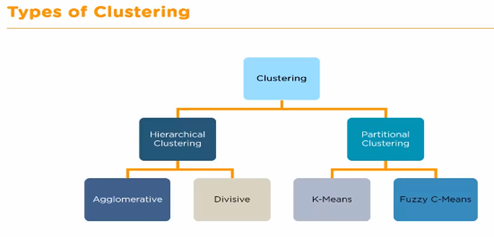

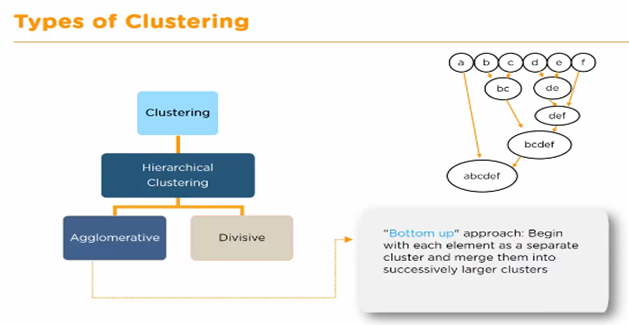

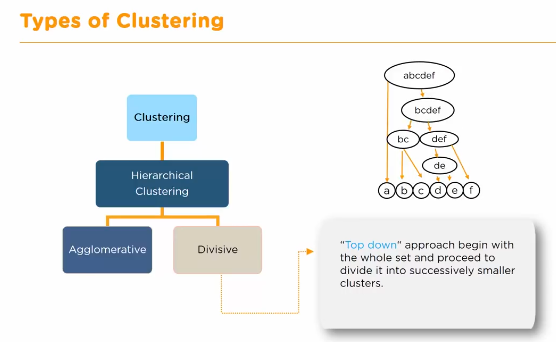

**Types of Hierarchical Clustering**

There are mainly two types of hierarchical clustering:

 - Agglomerative hierarchical clustering
 - Divisive Hierarchical clustering

# Agglomerative Hierarchical Clustering
We assign each point to an individual cluster in this technique. Suppose there are 4 data points. We will assign each of these points to a cluster and hence will have 4 clusters in the beginning:

<img src = https://cdn.analyticsvidhya.com/wp-content/uploads/2019/05/Screenshot-from-2019-05-15-13-11-28.png>

Then, at each iteration, we merge the closest pair of clusters and repeat this step until only a single cluster is left:

<img src = https://cdn.analyticsvidhya.com/wp-content/uploads/2019/05/Screenshot-from-2019-05-15-13-31-06.png>

We are merging (or adding) the clusters at each step, right? Hence, this type of clustering is also known as additive hierarchical clustering

# Divisive Hierarchical Clustering
Divisive hierarchical clustering works in the opposite way. Instead of starting with n clusters (in case of n observations), we start with a single cluster and assign all the points to that cluster.

So, it doesn’t matter if we have 10 or 1000 data points. All these points will belong to the same cluster at the beginning:

<img src = https://cdn.analyticsvidhya.com/wp-content/uploads/2019/05/Screenshot-from-2019-05-15-13-12-35.png>

Now, at each iteration, we split the farthest point in the cluster and repeat this process until each cluster only contains a single point:

<img src = https://cdn.analyticsvidhya.com/wp-content/uploads/2019/05/Screenshot-from-2019-05-15-13-11-28.png>

We are splitting (or dividing) the clusters at each step, hence the name divisive hierarchical clustering

Suppose a teacher wants to divide her students into different groups. She has the marks scored by each student in an assignment and based on these marks, she wants to segment them into groups. There’s no fixed target here as to how many groups to have. Since the teacher does not know what type of students should be assigned to which group, it cannot be solved as a supervised learning problem. So, we will try to apply hierarchical clustering here and segment the students into different groups.

<img src = https://cdn.analyticsvidhya.com/wp-content/uploads/2019/05/Screenshot-from-2019-05-17-16-12-33.png>

# Creating a Proximity Matrix
First, we will create a proximity matrix which will tell us the distance between each of these points. Since we are calculating the distance of each point from each of the other points, we will get a square matrix of shape n X n (where n is the number of observations).

Let’s make the 5 x 5 proximity matrix for our example:

<img src = https://cdn.analyticsvidhya.com/wp-content/uploads/2019/05/Screenshot-from-2019-05-15-14-46-36.png>

The diagonal elements of this matrix will always be 0 as the distance of a point with itself is always 0. We will use the Euclidean distance formula to calculate the rest of the distances. So, let’s say we want to calculate the distance between point 1 and 2:

√(10-7)^2 = √9 = 3

Similarly, we can calculate all the distances and fill the proximity matrix.

# Steps to Perform Hierarchical Clustering

### Step 1: First, we assign all the points to an individual cluster:

<img src = https://cdn.analyticsvidhya.com/wp-content/uploads/2019/05/Screenshot-from-2019-05-15-14-54-20.png>

Different colors here represent different clusters. You can see that we have 5 different clusters for the 5 points in our data.

### Step 2: Next, we will look at the smallest distance in the proximity matrix and merge the points with the smallest distance. We then update the proximity matrix:

<img src = https://cdn.analyticsvidhya.com/wp-content/uploads/2019/05/Screenshot-from-2019-05-15-14-57-30.png>

Here, the smallest distance is 3 and hence we will merge point 1 and 2:

<img src = https://cdn.analyticsvidhya.com/wp-content/uploads/2019/05/Screenshot-from-2019-05-15-14-58-11.png>

Let’s look at the updated clusters and accordingly update the proximity matrix:

<img src = https://cdn.analyticsvidhya.com/wp-content/uploads/2019/05/Screenshot-from-2019-05-15-14-59-19.png>

Here, we have taken the maximum of the two marks (7, 10) to replace the marks for this cluster. Instead of the maximum, we can also take the minimum value or the average values as well. Now, we will again calculate the proximity matrix for these clusters:

<img src = https://cdn.analyticsvidhya.com/wp-content/uploads/2019/05/Screenshot-from-2019-05-15-15-01-11.png>

### Step 3: We will repeat step 2 until only a single cluster is left.

So, we will first look at the minimum distance in the proximity matrix and then merge the closest pair of clusters. We will get the merged clusters as shown below after repeating these steps:

<img src = https://cdn.analyticsvidhya.com/wp-content/uploads/2019/05/Screenshot-from-2019-05-15-15-03-17.png>

We started with 5 clusters and finally have a single cluster. This is how agglomerative hierarchical clustering works. But the burning question still remains – how do we decide the number of clusters? Let’s understand that.

To get the number of clusters for hierarchical clustering, we make use of an awesome concept called a Dendrogram.

A dendrogram is a tree-like diagram that records the sequences of merges or splits.

Let’s get back to our teacher-student example. Whenever we merge two clusters, a dendrogram will record the distance between these clusters and represent it in graph form. Let’s see how a dendrogram looks like:

We have the samples of the dataset on the x-axis and the distance on the y-axis. Whenever two clusters are merged, we will join them in this dendrogram and the height of the join will be the distance between these points. Let’s build the dendrogram for our example:


<img src = https://cdn.analyticsvidhya.com/wp-content/uploads/2019/05/Screenshot-from-2019-05-15-15-03-17.png>

Take a moment to process the above image. We started by merging sample 1 and 2 and the distance between these two samples was 3 (refer to the first proximity matrix in the previous section). Let’s plot this in the dendrogram:

<img src = https://cdn.analyticsvidhya.com/wp-content/uploads/2019/05/Screenshot-from-2019-05-16-18-06-37.png>

Here, we can see that we have merged sample 1 and 2. The vertical line represents the distance between these samples. Similarly, we plot all the steps where we merged the clusters and finally, we get a dendrogram like this:

<img src = https://cdn.analyticsvidhya.com/wp-content/uploads/2019/05/Screenshot-from-2019-05-16-18-10-06.png>

Now, we can set a threshold distance and draw a horizontal line (Generally, we try to set the threshold in such a way that it cuts the tallest vertical line). Let’s set this threshold as 12 and draw a horizontal line:

<img src = https://cdn.analyticsvidhya.com/wp-content/uploads/2019/05/Screenshot-from-2019-05-16-18-12-55.png>

The number of clusters will be the number of vertical lines which are being intersected by the line drawn using the threshold. In the above example, since the red line intersects 2 vertical lines, we will have 2 clusters. One cluster will have a sample (1,2,4) and the other will have a sample (3,5). Pretty straightforward, right?

This is how we can decide the number of clusters using a dendrogram in Hierarchical Clustering. In the next section, we will implement hierarchical clustering which will help you to understand all the concepts that we have learned in this article.

<img src=https://i.stack.imgur.com/Q9ZPL.png>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc

df = pd.read_excel(r"C:\Users\HP\Python\Algorithms\K-Means\Iris_data.xlsx")
df.head()

,Unnamed: 0,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0,5.1,3.5,1.4,0.2
1,1,4.9,3.0,1.4,0.2
2,2,4.7,3.2,1.3,0.2
3,3,4.6,3.1,1.5,0.2
4,4,5.0,3.6,1.4,0.2


In [2]:
len(df)

150

In [2]:
df.drop('Unnamed: 0', axis = 1, inplace = True)

In [3]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
df.head(1)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2


In [6]:
df.tail(1)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
149,5.9,3.0,5.1,1.8


In [4]:
from sklearn.preprocessing import normalize
data_scaled = normalize(df)
# data_scaled

In [5]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [6]:
data_scaled = pd.DataFrame(data_scaled, columns = df.columns)
data_scaled.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.803773,0.551609,0.220644,0.031521
1,0.828133,0.507020,0.236609,0.033801
2,0.805333,0.548312,0.222752,0.034269
3,0.800030,0.539151,0.260879,0.034784
4,0.790965,0.569495,0.221470,0.031639


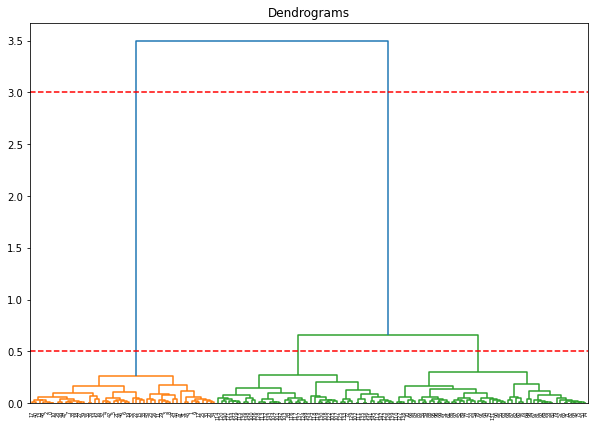

In [8]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=0.5, color='r', linestyle='--')
plt.axhline(y=3.0, color='r', linestyle='--')

In [9]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=4)  # 2, 3
grouped = cluster.fit_predict(data_scaled)

In [10]:
grouped

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 3, 3, 3, 3, 3, 3, 2, 2, 3, 2, 3, 2, 3, 2, 2,
       3, 2, 2, 2, 3, 2, 0, 3, 2, 2, 2, 3, 3, 2, 2, 2, 2, 0, 3, 3, 3, 2,
       3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 3,
       0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [14]:
data_scaled[grouped == 3]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
51,0.745498,0.372749,0.524178,0.174726
52,0.755193,0.339290,0.536296,0.164172
53,0.753849,0.315246,0.548254,0.178183
54,0.758175,0.326599,0.536555,0.174964
55,0.722330,0.354829,0.570260,0.164742
56,0.726348,0.380468,0.541879,0.184469
59,0.724602,0.376236,0.543452,0.195085
61,0.739235,0.375882,0.526235,0.187941
63,0.730814,0.347436,0.563086,0.167728
66,0.706319,0.378385,0.567578,0.189193


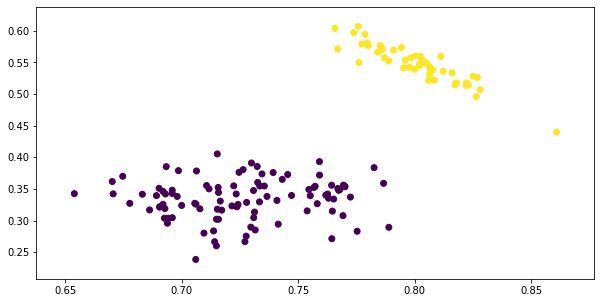

In [16]:
plt.figure(figsize=(10, 5))  
plt.scatter(data_scaled['sepal length (cm)'], data_scaled['sepal width (cm)'], c = grouped) 

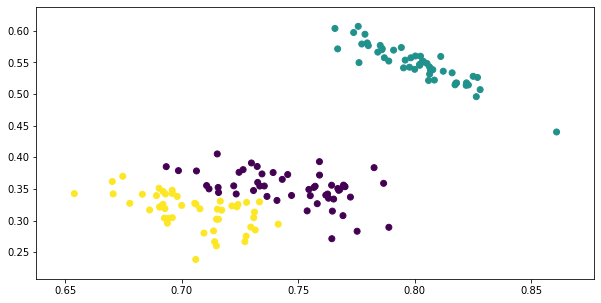

In [20]:
plt.figure(figsize=(10, 5))  
plt.scatter(data_scaled['sepal length (cm)'], data_scaled['sepal width (cm)'], c = grouped) 

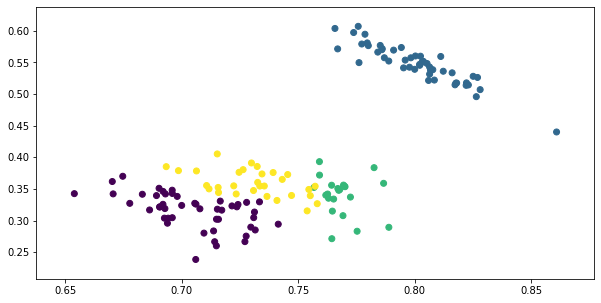

In [23]:
plt.figure(figsize=(10, 5))  
plt.scatter(data_scaled['sepal length (cm)'], data_scaled['sepal width (cm)'], c = grouped) 

In [ ]:
df_1 = data_scaled[grouped == 1]

In [ ]:
df_1.to_excel('group1.xlsx')
df_1.to_csv('group1.csv')

In [ ]:
pwd